# Classification Tree

-   Baskin Robbins nutritional information: http://www.baskinrobbins.ca/nutritional-information/
-   ref: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [2]:
pip install graphviz

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# %config InlineBackend.figure_format = 'retina'
%config InlineBackend.figure_format = 'svg'

In [4]:
url = "https://github.com/prasertcbs/basic-dataset/raw/master/baskin_robbins_classifier.csv"
df = pd.read_csv(url)
df

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),Category
0,Bananas Foster,160,8.0,0.2,20,16,2.0,std
1,Baseball Nut,160,9.0,0.2,19,13,3.0,std
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,std
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,std
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,light
...,...,...,...,...,...,...,...,...
65,Very Berry Strawberry,200,10.0,0.4,24,21,4.0,rich
66,Watermelon Splash,120,0.5,0.0,27,20,0.1,light
67,Wild ‘n Reckless,80,1.5,0.0,16,12,1.0,light
68,Winter White Chocolate,160,8.0,0.2,20,16,2.0,std


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flavour            70 non-null     object 
 1   Calories           70 non-null     int64  
 2   Total Fat (g)      70 non-null     float64
 3   Trans Fat (g)      70 non-null     float64
 4   Carbohydrates (g)  70 non-null     int64  
 5   Sugars (g)         70 non-null     int64  
 6   Protein (g)        70 non-null     float64
 7   Category           70 non-null     object 
dtypes: float64(3), int64(3), object(2)
memory usage: 4.5+ KB


In [6]:
df.columns

Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)', 'Category'],
      dtype='object')

In [7]:
cols = [
    "Calories",
    "Total Fat (g)",
    "Trans Fat (g)",
    "Carbohydrates (g)",
    "Sugars (g)",
    "Protein (g)"
]

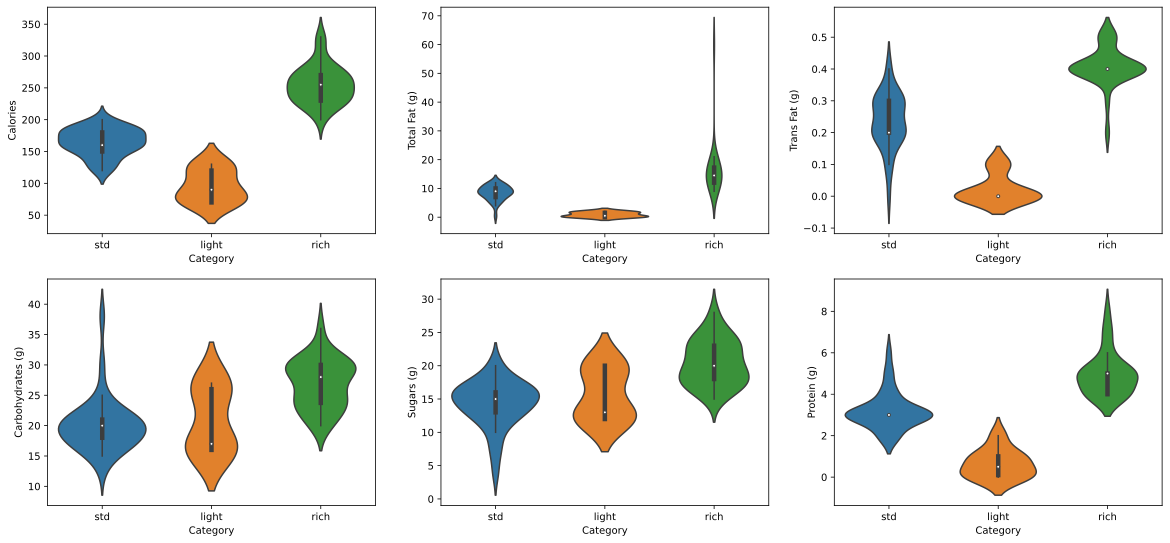

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 9))
ax = ax.ravel()
for i, col in enumerate(cols):
    sns.violinplot(x="Category", y=col, data=df, ax=ax[i])

In [9]:
corr = df[cols].corr()
corr

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
Calories,1.000000,0.712023,0.843900,0.602181,0.575605,0.822287
Total Fat (g),0.712023,1.000000,0.649645,0.244462,0.249821,0.595305
Trans Fat (g),0.843900,0.649645,1.000000,0.327513,0.406342,0.693241
Carbohydrates (g),0.602181,0.244462,0.327513,1.000000,0.635768,0.437426
Sugars (g),0.575605,0.249821,0.406342,0.635768,1.000000,0.285580
Protein (g),0.822287,0.595305,0.693241,0.437426,0.285580,1.000000


# Draw Decision Tree

In [10]:
"""
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix,
    plot_confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    precision_recall_fscore_support,
    f1_score
)
"""

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import *

In [11]:
X = df[cols] # features
y = df["Category"] #label

In [12]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=7)
X_train.shape

(56, 6)

In [13]:
model = DecisionTreeClassifier(criterion="gini") #gini is a default
# model=DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [14]:
X_train.columns

Index(['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)',
       'Sugars (g)', 'Protein (g)'],
      dtype='object')

In [15]:
model.feature_importances_

array([0.62367944, 0.31901352, 0.        , 0.        , 0.05730704,
       0.        ])

In [16]:
fs = pd.Series(model.feature_importances_,index=X_train.columns).sort_values(ascending=False)
fs

Calories             0.623679
Total Fat (g)        0.319014
Sugars (g)           0.057307
Trans Fat (g)        0.000000
Carbohydrates (g)    0.000000
Protein (g)          0.000000
dtype: float64

In [17]:
y_train.value_counts()

Category
std      26
rich     23
light     7
Name: count, dtype: int64

# Draw

In [18]:
clf = DecisionTreeClassifier(criterion="gini")
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
clf.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'monotonic_cst': None,
 'feature_names_in_': array(['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)',
        'Sugars (g)', 'Protein (g)'], dtype=object),
 'n_features_in_': 6,
 'n_outputs_': 1,
 'classes_': array(['light', 'rich', 'std'], dtype=object),
 'n_classes_': 3,
 'max_features_': 6,
 'tree_': <sklearn.tree._tree.Tree at 0x13d783436e0>}

In [20]:
clf.__dict__["tree_"]

In [21]:
type(clf)

sklearn.tree._classes.DecisionTreeClassifier

In [22]:
clf.__dict__["classes_"]

array(['light', 'rich', 'std'], dtype=object)

In [23]:
from sklearn.tree import export_graphviz
from graphviz import Digraph, Source


def view_tree(model, X, save_tree_img=False):
    estimators = clf
    dot_graph = export_graphviz(
        estimators,
        feature_names=X.columns,
        class_names=model.__dict__["classes_"],
        rounded=True,
        proportion=False,
        precision=2,
        filled=True,
    )
    #     with open(f'tree{tree_index}.dot') as f:
    #         dot_graph = f.read()
    g = Source(dot_graph)
    if save_tree_img:
        g.render(f"tree", format="png", view=False, cleanup=True)
    return g

In [24]:
view_tree(clf, X_test, save_tree_img=False)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
X_test

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
58,70,0.5,0.0,16,12,0.5
56,230,11.0,0.4,30,25,4.0
68,160,8.0,0.2,20,16,2.0
69,260,60.0,0.4,25,18,5.0
44,160,6.0,0.2,21,20,3.0
7,170,8.0,0.2,21,17,3.0
14,150,9.0,0.3,17,12,3.0
29,260,14.0,0.4,29,24,4.0
37,240,15.0,0.5,23,18,5.0
17,100,0.0,0.0,25,18,0.0


In [ ]:
predicted = model.predict(X_test)
predicted

array(['light', 'rich', 'std', 'rich', 'rich', 'std', 'std', 'rich',
       'rich', 'light', 'std', 'std', 'light', 'rich'], dtype=object)

In [ ]:
pd.crosstab(y_test, predicted)

col_0,light,rich,std
Category,,,
light,2,0,0
rich,0,5,0
std,1,1,5


In [ ]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

       light       0.90      1.00      0.95         9
        rich       0.97      1.00      0.98        28
         std       1.00      0.94      0.97        33

    accuracy                           0.97        70
   macro avg       0.96      0.98      0.97        70
weighted avg       0.97      0.97      0.97        70

